<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/Incidence_Diabetes_Machine_Learning_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[GitHUb Link](https://github.com/henriquebap)

# Machine Learning Ex

This dataset contains data on the incidence of diabetes in women of the Pima Indian tribe (Native Americans originally from the current state of Arizona). It comprises 8 biomedical attributes for 768 anonymized entries, with 500 tested negative for diabetes and 268 tested positive for diabetes.

The dataset is available at https://www.openml.org/d/37.


---


There are 8 attributes along with the class (where 1 indicates testing positive for diabetes):

preg Number of times pregnant
plas Plasma glucose concentration 2 hours after an oral glucose tolerance test
pres Diastolic blood pressure (mm Hg)
skin Triceps skinfold thickness (mm)
insu 2-Hour serum insulin (mu U/mL)
mass Body mass index (weight in kg/height in m²)
pedi Diabetes pedigree function
age Age (years)
Class variable (0 or 1)

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
dados = fetch_openml(data_id=37)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
type(dados)

sklearn.utils._bunch.Bunch

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(dados.data,columns=dados.feature_names)

In [7]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [8]:
dados.target_names

['class']

In [9]:
list(dados.target).count('tested_negative')

500

In [10]:
list(dados.target).count('tested_positive')

268

In [11]:
target_map={
    'tested_positive':'tested_positive',
    'tested_negative':'tested_negative'
}

In [12]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [13]:
df['result'] = [target_map[target] for target in dados.target]

In [14]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,tested_positive
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,tested_negative
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,tested_positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,tested_positive


In [15]:
import seaborn as sns

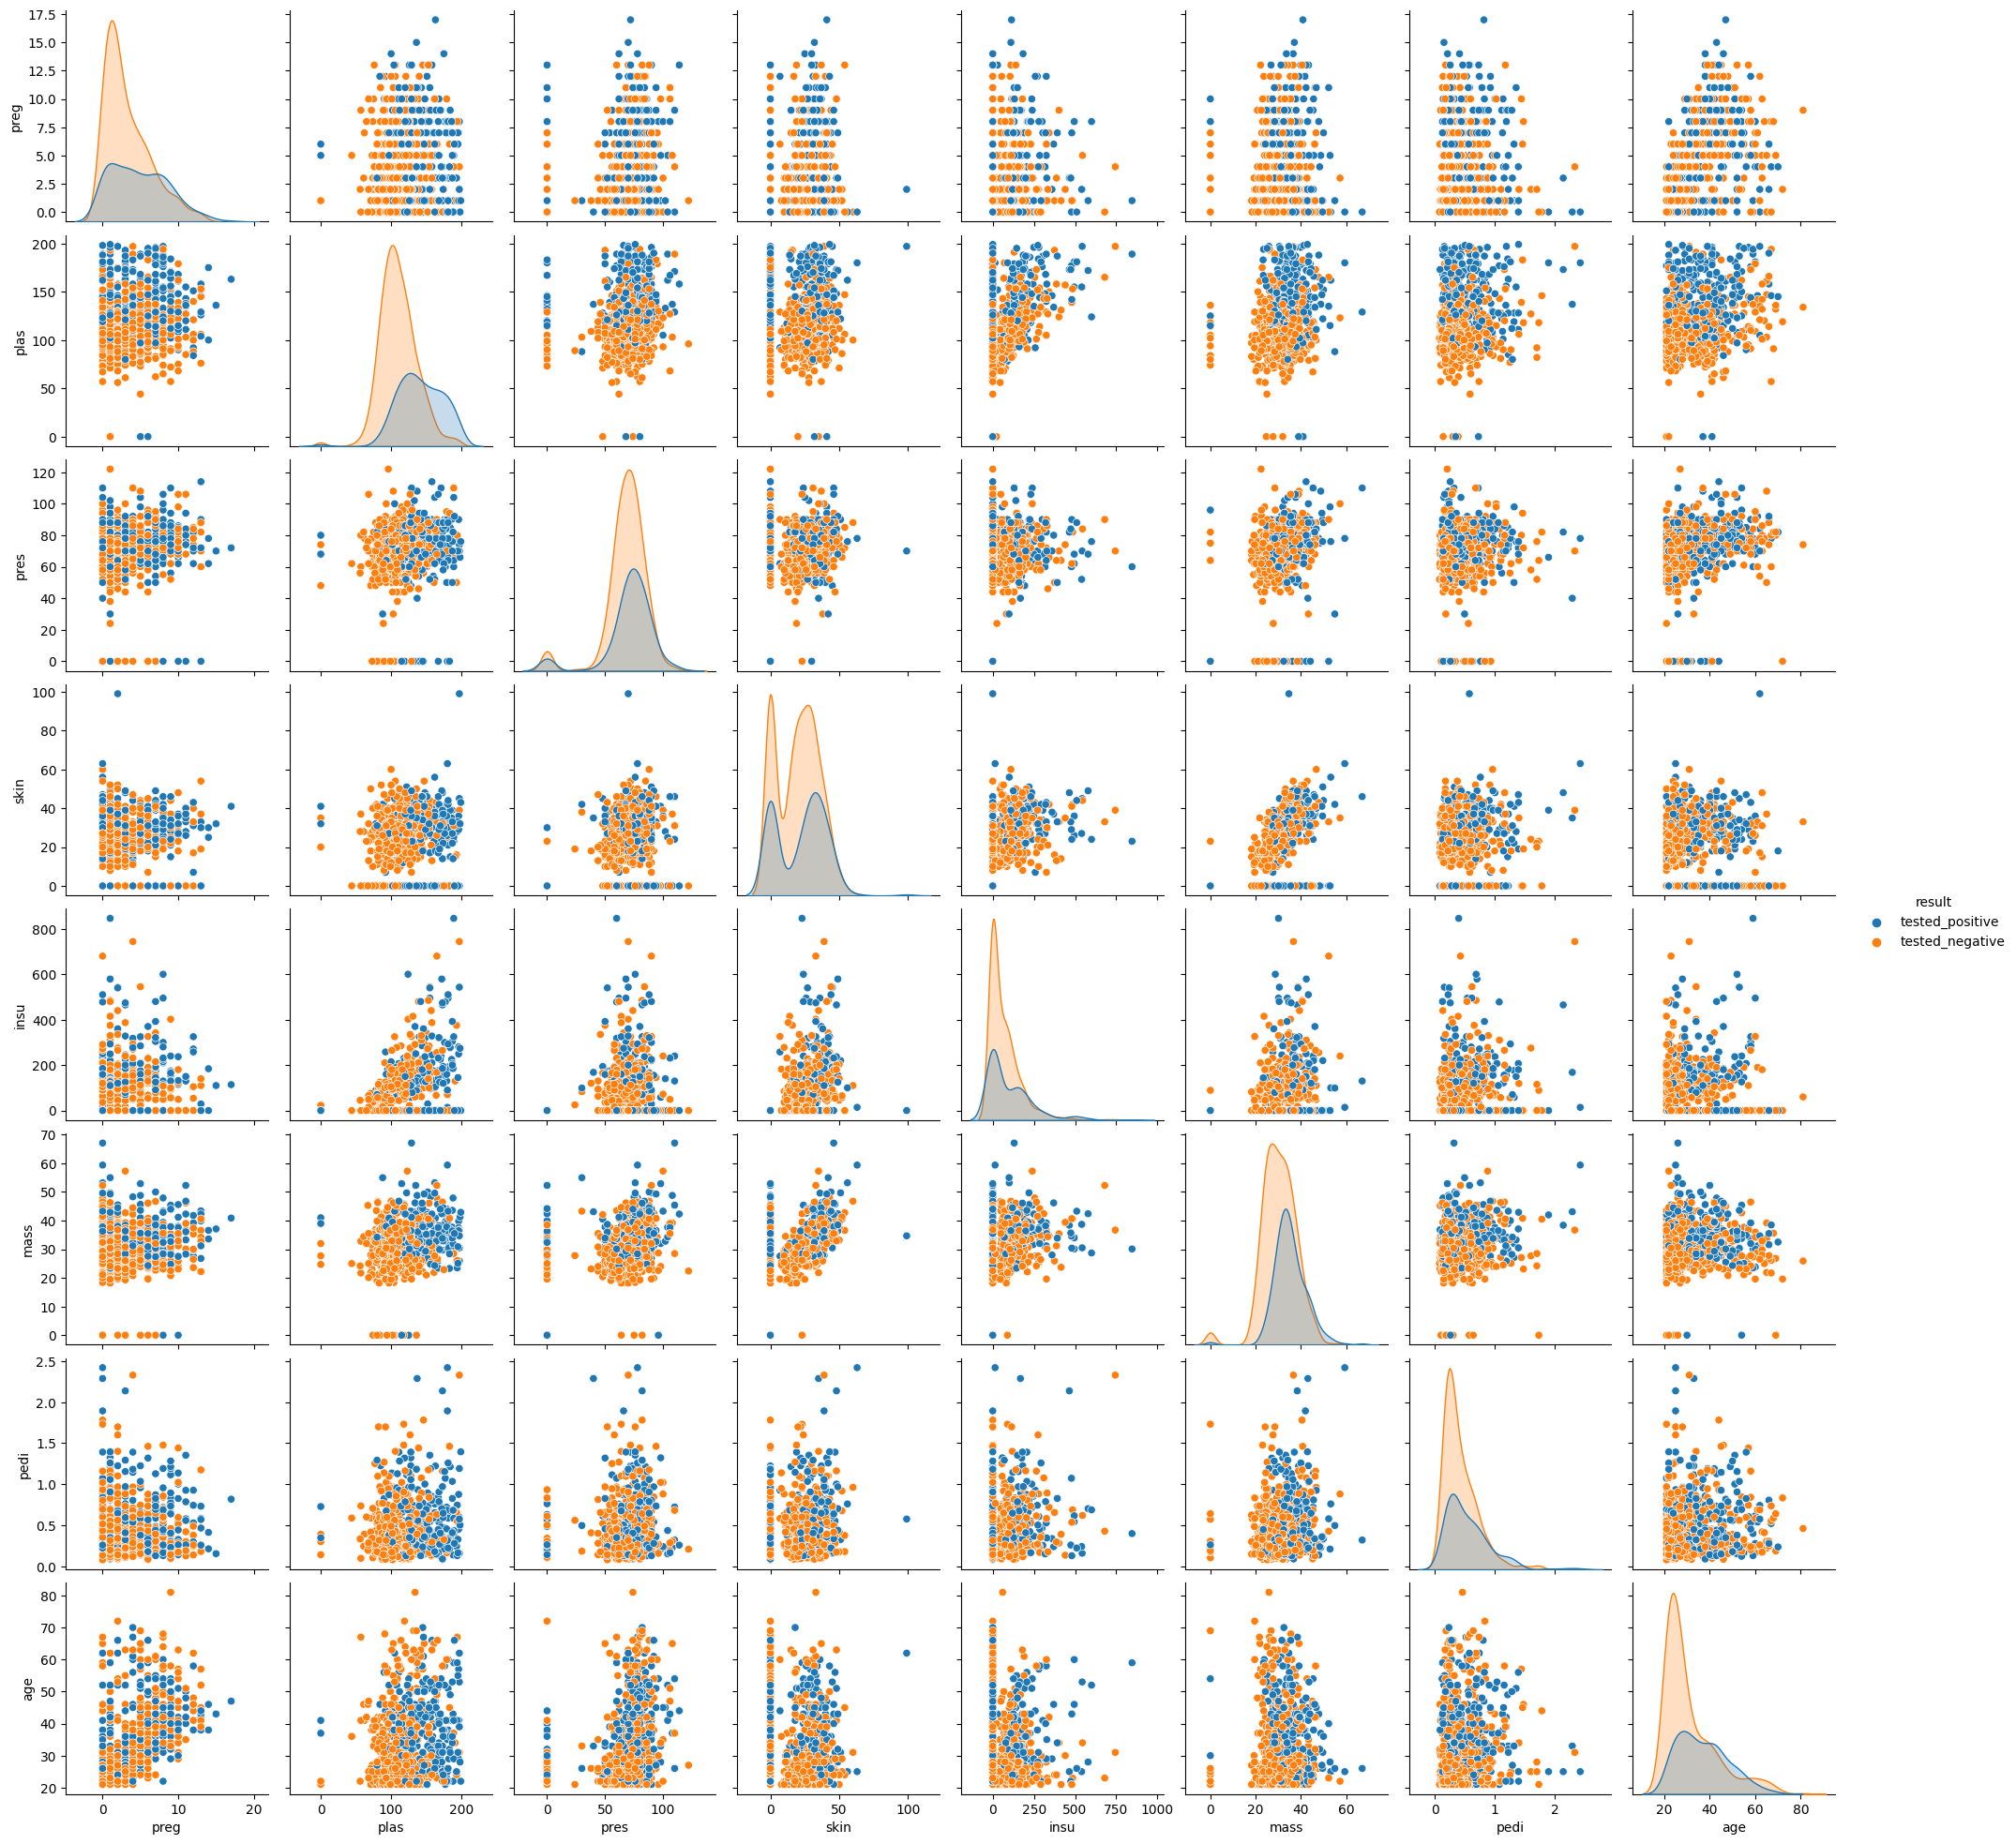

In [16]:
sns.pairplot(df, hue='result')

In [17]:
df.groupby('result').mean()

,preg,plas,pres,skin,insu,mass,pedi,age
result,,,,,,,,
tested_negative,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
tested_positive,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
df.groupby('result').std()

,preg,plas,pres,skin,insu,mass,pedi,age
result,,,,,,,,
tested_negative,3.017185,26.141200,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
tested_positive,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['result']) #
y = df['result']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

In [21]:
# Instanciando o Escalonador
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# # RandomForest
# from sklearn.ensemble import RandomForestClassifier

# # Passo 4 - Treinar o Classificador
# rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
# rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

# # Passo 5 - Testar o Classificador
# y_predicoes = rf.predict(x_test)

# # Metricas de precisão, revocação, f1-score e acurácia.
# print(classification_report(y_test, y_predicoes))

                 precision    recall  f1-score   support

tested_negative       0.79      0.82      0.81       102
tested_positive       0.62      0.58      0.60        52

       accuracy                           0.74       154
      macro avg       0.71      0.70      0.70       154
   weighted avg       0.74      0.74      0.74       154



In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento

LinearDiscriminantAnalysis()

### Exercício 4.2: Crie um classificador que prediz se uma determinada mulher tem ou não um diagnostico positivo para diabetes. Qual foi o melhor modelo (em acurácia) que você conseguiur criar?

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [24]:
y_predicoes = lda.predict(x_test_scaled)

<Figure size 1500x500 with 0 Axes>

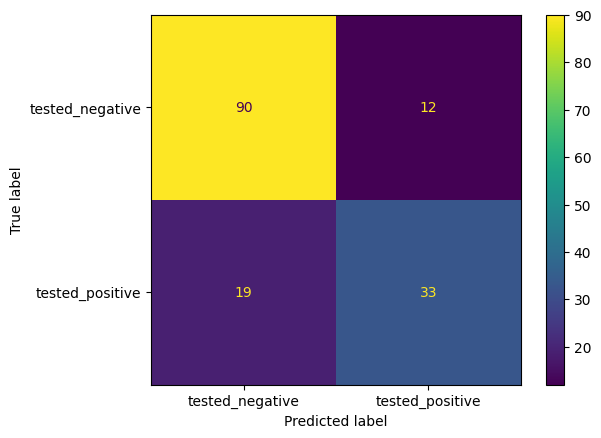

In [25]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['tested_negative','tested_positive'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                              display_labels=['tested_negative','tested_positive'])
disp.plot(values_format='d')

In [26]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

                 precision    recall  f1-score   support

tested_negative       0.83      0.88      0.85       102
tested_positive       0.73      0.63      0.68        52

       accuracy                           0.80       154
      macro avg       0.78      0.76      0.77       154
   weighted avg       0.79      0.80      0.79       154



In [27]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_predicoes)

0.5346071358939364